<a href="https://colab.research.google.com/github/shashankbhagat/Logistic-Regression/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [6]:
titanic_df=pd.read_csv('sample_data/titanic.csv')
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
titanic_df.shape
titanic_df.head(0)
titanic_df.drop(['PassengerId','Name','Ticket','Cabin'],'columns',inplace=True)
titanic_df.head(0)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [10]:
titanic_df[titanic_df.isnull().any(axis=1)].count()
#titanic_df.shape

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [28]:
titanic_df.shape

(712, 8)

In [0]:
titanic_df=titanic_df.dropna()

In [11]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Text(0, 0.5, 'Survived')

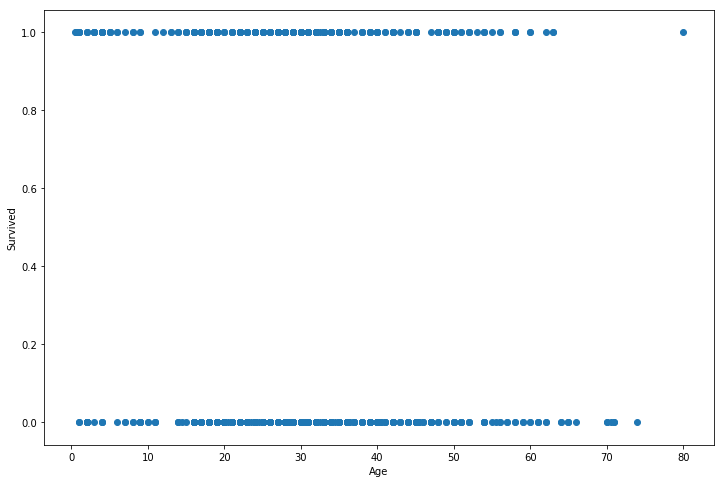

In [12]:
fig, ax=plt.subplots(figsize=(12,8))
plt.scatter(titanic_df['Age'],titanic_df['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

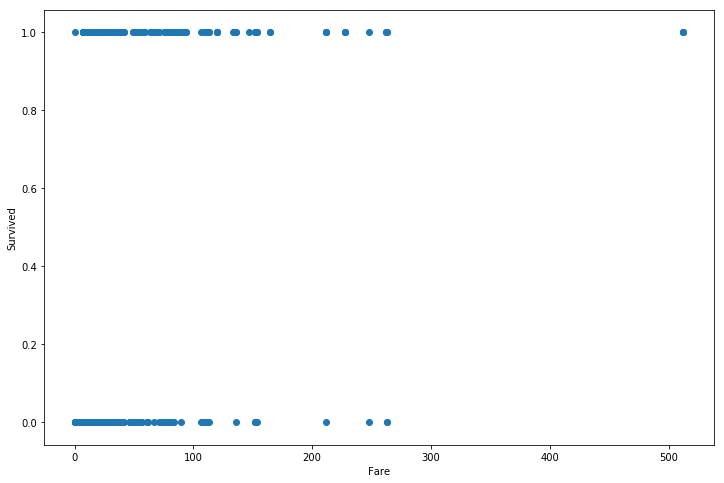

In [13]:
fig, ax=plt.subplots(figsize=(12,8))
plt.scatter(titanic_df['Fare'],titanic_df['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')

In [14]:
pd.crosstab(titanic_df['Sex'],titanic_df['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


In [15]:
pd.crosstab(titanic_df['Pclass'],titanic_df['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [16]:
titanic_data_corr=titanic_df.corr()
titanic_data_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


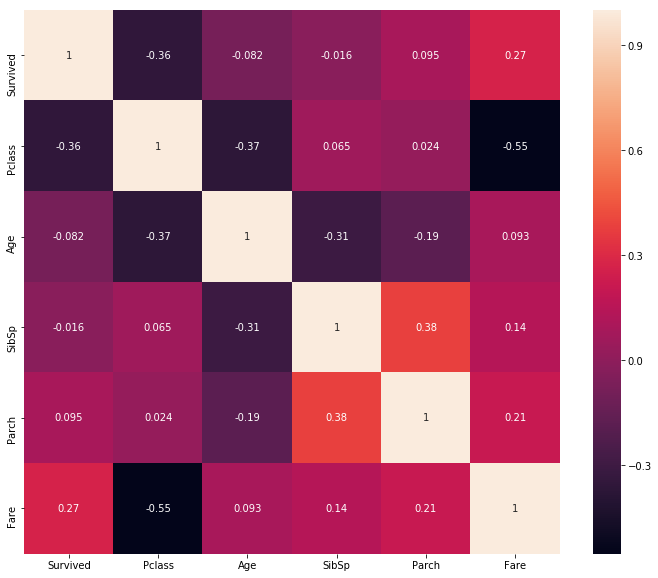

In [17]:
fig, ax=plt.subplots(figsize=(12,10))
sns.heatmap(titanic_data_corr,annot=True)

In [18]:
from sklearn import preprocessing

label_encoding=preprocessing.LabelEncoder()
titanic_df['Sex']=label_encoding.fit_transform(titanic_df['Sex'].astype(str))
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [19]:
label_encoding.classes_

array(['female', 'male'], dtype=object)

Following is a way of one-hot encoding. USed for data that is not ordered like male, female, etc

In [20]:
titanic_df=pd.get_dummies(titanic_df,columns=['Embarked'])
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [21]:
titanic_df=titanic_df.sample(frac=1).reset_index(drop=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,27.0,0,0,7.7958,0,0,1
1,0,2,1,52.0,0,0,13.0000,0,0,1
2,1,3,0,38.0,1,5,31.3875,0,0,1
3,0,3,1,32.0,0,0,7.8958,0,0,1
4,0,3,1,74.0,0,0,7.7750,0,0,1


In [0]:
titanic_df.to_csv('sample_data/titanic_processed.csv',index=False)

In [25]:
!ls sample_data/

anscombe.json		      mnist_test.csv	     titanic.csv
california_housing_test.csv   mnist_train_small.csv  titanic_processed.csv
california_housing_train.csv  README.md


In [0]:
from sklearn.model_selection import train_test_split
X=titanic_df.drop('Survived',axis=1)
Y=titanic_df['Survived']

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [0]:
from sklearn.linear_model import LogisticRegression

logistic_model=LogisticRegression(penalty='l2',C=1.0,solver='liblinear').fit(x_train,y_train)

In [0]:
y_pred=logistic_model.predict(x_test)

In [0]:
pred_results=pd.DataFrame({'y_test':y_test,
                          'y_pred':y_pred})

In [39]:
pred_results.head()

,y_test,y_pred
665,0,0
455,0,0
223,0,0
650,0,0
700,1,1


In [40]:
titanic_crosstab=pd.crosstab(pred_results.y_pred,pred_results.y_test)
titanic_crosstab

y_test,0,1
y_pred,,
0,67,15
1,15,46


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [44]:
acc=accuracy_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)

print('accuracy score: ',acc)
print('precision score: ',pre)
print('recall score: ',recall)

accuracy score:  0.7902097902097902
precision score:  0.7540983606557377
recall score:  0.7540983606557377


Accuracy: how many overall predictions are correct
Precision : How many of the model predicted survived, actually survived.
Recall: How many survived of all the actual survived.

In [46]:
titanic_crosstab

y_test,0,1
y_pred,,
0,67,15
1,15,46


In [54]:
acc1=(67+46)/(67+15+15+46)
print(acc1)
prec1=46/(46+15)
print(prec1)
recall1=46/(46+15)
print(recall1)

0.7902097902097902
0.7540983606557377
0.7540983606557377


MULTIPLE CLASSIFICATION MODELS

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [56]:
FEATURES=list(titanic_df.columns[1:])
FEATURES

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [0]:
result_dict={}

In [0]:
def summarize_classification(y_test,y_pred):
    acc=accuracy_score(y_test,y_pred,normalize=True)
    num_acc=accuracy_score(y_test,y_pred, normalize=False)
    prec=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    
    return {'accuracy':acc,
           'precision':prec,
           'recall':recall,
           'accuracy_count':num_acc}

In [0]:
def build_model(classifier_fn,
               name_of_y_col,
               name_of_x_cols,
               dataset,
               test_frac=0.2):
    
    X=dataset[name_of_x_cols]
    Y=dataset[name_of_y_col]
    
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=test_frac)
    
    model=classifier_fn(x_train,y_train)
    
    y_pred=model.predict(x_test)
    y_pred_train=model.predict(x_train)
    
    train_summary=summarize_classification(y_train,y_pred_train)
    test_summary=summarize_classification(y_test,y_pred)
    
    pred_results=pd.DataFrame({'y_test':y_test,
                              'y_pred':y_pred})
    
    model_crosstab=pd.crosstab(pred_results.y_pred,pred_results.y_test)
    
    return {'training':train_summary,
           'test':test_summary,
           'confusion_matrix':model_crosstab}

In [0]:
def compare_results():
    for key in result_dict:
        print('Classification:', key)
        print()
        print('Training Data')
        for score in result_dict[key]['training']:
            print(score,result_dict[key]['training'][score])
            
        print()
        print('Test Data')
        for score in result_dict[key]['test']:
            print(score,result_dict[key]['test'][score])
            
        print()
        

In [0]:
def logistic_fn(x_train,y_train):
    model=LogisticRegression(solver='liblinear')
    model.fit(x_train,y_train)
    return model

In [65]:
result_dict['survived - logistic']=build_model(logistic_fn,
                                              'Survived',
                                              FEATURES,
                                              titanic_df)
compare_results()

Classification: survived - logistic

Training Data
accuracy 0.7926186291739895
precision 0.7766497461928934
recall 0.6740088105726872
accuracy_count 451

Test Data
accuracy 0.7972027972027972
precision 0.7857142857142857
recall 0.7213114754098361
accuracy_count 114

